In [1]:
# 가우스 잡음 추가 함수
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# 가우스 노이즈
# noiy_pixel = original_pixel + N(u=0, e = scale)
# 평균 = 0 : 픽셀을 전체적으로 밝히거나 어둡게 하지 않음
# 표준편차 = sacle-> 값이 클수록 노이즈가 강해짐
# 0.8 - > 노이즈의 양 많고.. 숫자 일부를 흐릿

In [2]:
def gaussian_noise(x, scale=0.8):
    gaussian_data_x = x +  np.random.normal(
        loc = 0, scale =scale, size = x.shape
    )
    gaussian_data_x = np.clip(gaussian_data_x,0,1)  # 이미지픽셀의 값을 0과 1사이로 정규화
    gaussian_data_x = torch.tensor(gaussian_data_x,dtype=torch.float32)
    return gaussian_data_x

In [ ]:
traning_data = MNIST(root='./', train=True, download=True,transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True,transform=ToTensor())

C:\Users\playdata2\AppData\Local\Temp\ipykernel_9028\2047172819.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  gaussian_data_x = x +  np.random.normal(
C:\Users\playdata2\AppData\Local\Temp\ipykernel_9028\2047172819.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gaussian_data_x = torch.tensor(gaussian_data_x,dtype=torch.float32)


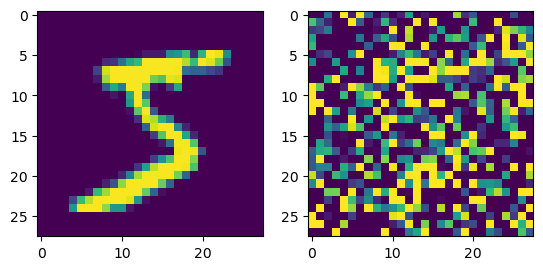

In [13]:
img,label = next(iter(traning_data))
gaussian = gaussian_noise(img)
img = img.permute(1,2,0)
gaussian = gaussian.permute(1,2,0)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(gaussian)

In [ ]:
# 학습용 데이터셋
